In [16]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


In [17]:
# 카테고리 데이터를 리스트로 정의
categories = [
    'APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 
    'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 
    'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 
    'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 
    'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 
    'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO', 
    'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 
    'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 
    'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 
    'WATCH_FACE', 'WEATHER', 'GAME', 'GAME_ACTION', 'GAME_ADVENTURE', 
    'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 
    'GAME_CASUAL', 'GAME_EDUCATIONAL', 'GAME_MUSIC', 
    'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING', 
    'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', 
    'GAME_TRIVIA', 'GAME_WORD', 'FAMILY'
]


In [18]:
# 사용자가 지정한 클러스터 수
num_clusters = 3  # 사용자가 3을 선택했다고 가정


In [19]:
# TF-IDF Vectorizer로 텍스트 데이터를 수치화
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(categories)


In [20]:
# K-means 클러스터링
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)



c:\Users\jeleez\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3, random_state=42)

In [21]:
# 클러스터 할당 결과 확인
labels = kmeans.labels_



In [22]:
# 각 클러스터에 속한 카테고리 출력
for i in range(num_clusters):
    cluster = [categories[j] for j in range(len(categories)) if labels[j] == i]
    print(f"Cluster {i+1}: {', '.join(cluster)}")



Cluster 1: APPLICATION, ANDROID_WEAR, ART_AND_DESIGN, AUTO_AND_VEHICLES, BEAUTY, BOOKS_AND_REFERENCE, BUSINESS, COMICS, DATING, EDUCATION, ENTERTAINMENT, EVENTS, FINANCE, FOOD_AND_DRINK, HEALTH_AND_FITNESS, HOUSE_AND_HOME, LIBRARIES_AND_DEMO, LIFESTYLE, MAPS_AND_NAVIGATION, MEDICAL, MUSIC_AND_AUDIO, NEWS_AND_MAGAZINES, PARENTING, PERSONALIZATION, PHOTOGRAPHY, PRODUCTIVITY, SHOPPING, SOCIAL, SPORTS, TOOLS, TRAVEL_AND_LOCAL, VIDEO_PLAYERS, WATCH_FACE, WEATHER, GAME, GAME_ACTION, GAME_ADVENTURE, GAME_ARCADE, GAME_BOARD, GAME_CARD, GAME_CASINO, GAME_CASUAL, GAME_EDUCATIONAL, GAME_MUSIC, GAME_PUZZLE, GAME_RACING, GAME_ROLE_PLAYING, GAME_SIMULATION, GAME_SPORTS, GAME_STRATEGY, GAME_WORD, FAMILY
Cluster 2: GAME_TRIVIA
Cluster 3: COMMUNICATION



Suggested Titles for Clusters:
Cluster 1 Title: weather watch_face game_educational game_casual game_casino
Cluster 2 Title: game_trivia weather family game_casual game_casino
Cluster 3 Title: communication weather family game_educational game_casual


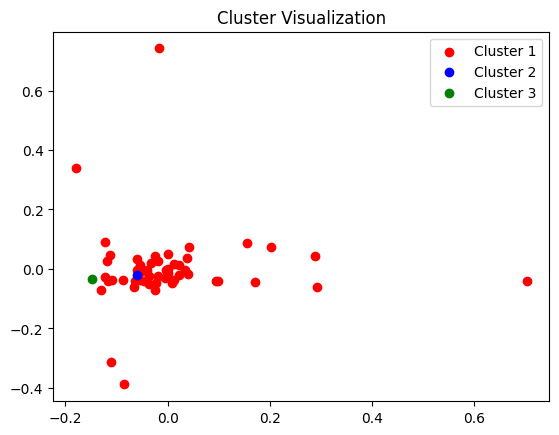

In [23]:
# 클러스터 중심 단어를 기반으로 타이틀 추출
order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()

print("\nSuggested Titles for Clusters:")
for i in range(num_clusters):
    top_terms = [terms[ind] for ind in order_centroids[i, :5]]  # 상위 5개의 단어로 타이틀 생성
    print(f"Cluster {i+1} Title: {' '.join(top_terms)}")

# 시각화 (PCA를 사용하여 2D로 축소)
pca = PCA(n_components=2)
scatter_plot_points = pca.fit_transform(X.toarray())

colors = ['r', 'b', 'g']
for i in range(num_clusters):
    points = scatter_plot_points[labels == i]
    plt.scatter(points[:, 0], points[:, 1], c=colors[i], label=f'Cluster {i+1}')

plt.title("Cluster Visualization")
plt.legend()
plt.show()


# BERT

In [1]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch

c:\Users\jeleez\AppData\Local\Programs\Python\Python38\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# BERT 모델 및 토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

c:\Users\jeleez\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renam

In [3]:
# 카테고리 데이터를 리스트로 정의
categories = [
    'APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 
    'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 
    'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 
    'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 
    'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 
    'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO', 
    'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 
    'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 
    'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 
    'WATCH_FACE', 'WEATHER', 'GAME', 'GAME_ACTION', 'GAME_ADVENTURE', 
    'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 
    'GAME_CASUAL', 'GAME_EDUCATIONAL', 'GAME_MUSIC', 
    'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING', 
    'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', 
    'GAME_TRIVIA', 'GAME_WORD', 'FAMILY'
]



In [15]:
# BERT 임베딩 생성 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=10)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

In [16]:
# 각 카테고리에 대해 BERT 임베딩 계산
embeddings = [get_bert_embedding(cat) for cat in categories]


In [17]:
# 클러스터 중심과 가장 유사한 카테고리 찾는 함수
def find_closest_category(center, embeddings, categories):
    similarities = cosine_similarity([center], embeddings)[0]
    closest_idx = np.argmax(similarities)
    return categories[closest_idx]

# Naming

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np


In [ ]:
# 클러스터 중심 계산
cluster_centers = kmeans.cluster_centers_


In [ ]:
# 클러스터 중심과 가장 유사한 카테고리 찾기
def find_closest_category(center, embeddings, categories):
    similarities = cosine_similarity([center], embeddings)[0]
    closest_idx = np.argmax(similarities)
    return categories[closest_idx]

In [18]:
# 사용자가 클러스터 수를 입력하면 동적으로 클러스터링을 수행하는 함수
def dynamic_clustering(num_clusters):
    # K-Means 클러스터링
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    labels = kmeans.fit_predict(embeddings)
    
    # 클러스터 할당 결과 출력 및 대표 카테고리 명명
    for i in range(num_clusters):
        cluster = [categories[j] for j in range(len(categories)) if labels[j] == i]
        closest_category = find_closest_category(kmeans.cluster_centers_[i], embeddings, categories)
        print(f"Cluster {i+1} ({closest_category}): {', '.join(cluster)}")
    
    # 시각화 (PCA를 사용하여 2D로 축소)
    pca = PCA(n_components=2)
    scatter_plot_points = pca.fit_transform(embeddings)
    
    # 색상 배열 생성 (컬러맵 사용)
    cmap = plt.cm.get_cmap("tab10", num_clusters)
    colors = [cmap(i) for i in range(num_clusters)]
    
    for i in range(num_clusters):
        points = scatter_plot_points[labels == i]
        plt.scatter(points[:, 0], points[:, 1], color=colors[i], label=f'Cluster {i+1}')
    
    plt.title(f"Cluster Visualization with {num_clusters} Clusters")
    plt.legend()
    plt.show()


Cluster 1 (LIFESTYLE): APPLICATION, BEAUTY, BUSINESS, COMICS, COMMUNICATION, DATING, ENTERTAINMENT, LIFESTYLE, MEDICAL, PARENTING, PERSONALIZATION, PRODUCTIVITY, SHOPPING, SOCIAL, TOOLS, WEATHER, GAME, FAMILY
Cluster 2 (WATCH_FACE): ANDROID_WEAR, WATCH_FACE
Cluster 3 (MAPS_AND_NAVIGATION): ART_AND_DESIGN, AUTO_AND_VEHICLES, BOOKS_AND_REFERENCE, FOOD_AND_DRINK, HEALTH_AND_FITNESS, HOUSE_AND_HOME, LIBRARIES_AND_DEMO, MAPS_AND_NAVIGATION, MUSIC_AND_AUDIO, NEWS_AND_MAGAZINES, TRAVEL_AND_LOCAL
Cluster 4 (GAME_MUSIC): GAME_MUSIC, GAME_ROLE_PLAYING, GAME_SPORTS, GAME_TRIVIA
Cluster 5 (GAME_RACING): VIDEO_PLAYERS, GAME_ACTION, GAME_ADVENTURE, GAME_ARCADE, GAME_BOARD, GAME_CARD, GAME_CASINO, GAME_CASUAL, GAME_EDUCATIONAL, GAME_PUZZLE, GAME_RACING, GAME_SIMULATION, GAME_STRATEGY, GAME_WORD
Cluster 6 (EVENTS): EVENTS
Cluster 7 (EDUCATION): EDUCATION, FINANCE, PHOTOGRAPHY, SPORTS


c:\Users\jeleez\AppData\Local\Programs\Python\Python38\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\jeleez\AppData\Local\Temp\ipykernel_15884\1885922862.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap("tab10", num_clusters)


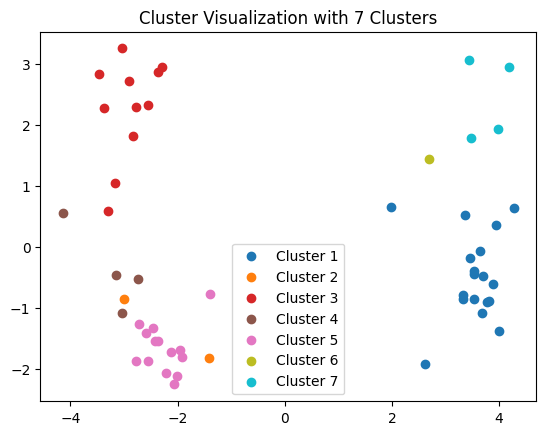

In [19]:
# 클러스터 수 입력받기
num_clusters = 7
dynamic_clustering(num_clusters)

# BERT vs. Word2Vec vs. LDA

In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score
import numpy as np
import torch
from transformers import BertTokenizer, BertModel

# BERT 모델 및 토크나이저 불러오기
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

# 가상의 카테고리 데이터 정의 (Word2Vec 및 LDA 임베딩에도 동일한 데이터 사용)
categories = [
    'APPLICATION', 'ANDROID_WEAR', 'ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 
    'BEAUTY', 'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 
    'COMMUNICATION', 'DATING', 'EDUCATION', 'ENTERTAINMENT', 
    'EVENTS', 'FINANCE', 'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 
    'HOUSE_AND_HOME', 'LIBRARIES_AND_DEMO', 'LIFESTYLE', 
    'MAPS_AND_NAVIGATION', 'MEDICAL', 'MUSIC_AND_AUDIO', 
    'NEWS_AND_MAGAZINES', 'PARENTING', 'PERSONALIZATION', 
    'PHOTOGRAPHY', 'PRODUCTIVITY', 'SHOPPING', 'SOCIAL', 
    'SPORTS', 'TOOLS', 'TRAVEL_AND_LOCAL', 'VIDEO_PLAYERS', 
    'WATCH_FACE', 'WEATHER', 'GAME', 'GAME_ACTION', 'GAME_ADVENTURE', 
    'GAME_ARCADE', 'GAME_BOARD', 'GAME_CARD', 'GAME_CASINO', 
    'GAME_CASUAL', 'GAME_EDUCATIONAL', 'GAME_MUSIC', 
    'GAME_PUZZLE', 'GAME_RACING', 'GAME_ROLE_PLAYING', 
    'GAME_SIMULATION', 'GAME_SPORTS', 'GAME_STRATEGY', 
    'GAME_TRIVIA', 'GAME_WORD', 'FAMILY'
]

# BERT 임베딩 생성 함수
def get_bert_embedding(text):
    inputs = tokenizer(text, return_tensors='pt', truncation=True, padding=True, max_length=10)
    with torch.no_grad():
        outputs = model(**inputs)
    return outputs.last_hidden_state.mean(dim=1).squeeze().numpy()

# BERT 임베딩 계산
bert_embeddings = [get_bert_embedding(cat) for cat in categories]

# 가상의 Word2Vec 및 LDA 임베딩 생성 (실제 Word2Vec 및 LDA 모델을 사용하여 임베딩을 생성해야 합니다)
word2vec_embeddings = np.random.rand(len(categories), 300)  # 예시로 300차원의 랜덤 벡터 생성
lda_embeddings = np.random.rand(len(categories), 10)  # 예시로 10차원의 랜덤 벡터 생성

# 클러스터 수 설정
num_clusters = 3

# BERT 클러스터링
kmeans_bert = KMeans(n_clusters=num_clusters, random_state=42)
bert_labels = kmeans_bert.fit_predict(bert_embeddings)

# Word2Vec 클러스터링
kmeans_word2vec = KMeans(n_clusters=num_clusters, random_state=42)
word2vec_labels = kmeans_word2vec.fit_predict(word2vec_embeddings)

# LDA 클러스터링
kmeans_lda = KMeans(n_clusters=num_clusters, random_state=42)
lda_labels = kmeans_lda.fit_predict(lda_embeddings)

# 클러스터링 결과 평가 함수
def evaluate_clustering(embeddings, labels):
    silhouette_avg = silhouette_score(embeddings, labels)
    davies_bouldin_avg = davies_bouldin_score(embeddings, labels)
    calinski_harabasz_avg = calinski_harabasz_score(embeddings, labels)
    
    return silhouette_avg, davies_bouldin_avg, calinski_harabasz_avg

# BERT, Word2Vec, LDA 결과 비교
bert_scores = evaluate_clustering(bert_embeddings, bert_labels)
word2vec_scores = evaluate_clustering(word2vec_embeddings, word2vec_labels)
lda_scores = evaluate_clustering(lda_embeddings, lda_labels)

c:\Users\jeleez\AppData\Local\Programs\Python\Python38\lib\site-packages\transformers\tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renamed internally to `bias`. Please use a different name to suppress this warning.
A parameter name that contains `gamma` will be renamed internally to `weight`. Please use a different name to suppress this warning.
A parameter name that contains `beta` will be renam

In [23]:
# 결과 출력
print("BERT Scores (Silhouette, Davies-Bouldin, Calinski-Harabasz):", bert_scores)
print("Word2Vec Scores (Silhouette, Davies-Bouldin, Calinski-Harabasz):", word2vec_scores)
print("LDA Scores (Silhouette, Davies-Bouldin, Calinski-Harabasz):", lda_scores)


BERT Scores (Silhouette, Davies-Bouldin, Calinski-Harabasz): (0.24251519, 1.5942797740601102, 19.795683186508473)
Word2Vec Scores (Silhouette, Davies-Bouldin, Calinski-Harabasz): (0.006264391084343818, 5.057613234709344, 1.3224777048994565)
LDA Scores (Silhouette, Davies-Bouldin, Calinski-Harabasz): (0.09784756998640957, 2.405821950111756, 6.5870431777843965)
